In [9]:
from SequentialPOVMMeasurement import SequentialPOVMMeasurement
import qiskit
from qiskit import *
from utilities import simple_povm_xyz, povm_tetrahedron, scale_noise
from ProbabilisticMeasurement import ProbabilisticMeasurement
from qiskit import IBMQ
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise.noise_model import NoiseModel
from qiskit.providers.aer.noise import ReadoutError
import numpy as np
from utilities import scale_noise, vd, vd_int, povm_bell
from scipy.stats import wasserstein_distance
from qiskit import IBMQ
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise.noise_model import NoiseModel
from qiskit.providers.aer.noise import ReadoutError
import matplotlib.pyplot as plt

In [10]:
IBMQ.load_account()
# Device to be simulated
dev = IBMQ.get_provider().get_backend("ibmq_manila")

# Extracted simulator for the device
sim = AerSimulator.from_backend(dev)

# noise model of the simulator
noise_model = NoiseModel().from_backend(dev)

ibmqfactory.load_account:WARNING:2022-04-22 07:24:34,112: Credentials are already in use. The existing account in the session will be replaced.


In [11]:
# Initialize the object using POVM effects and assign labels to them
seq = SequentialPOVMMeasurement(povm_bell, ["phi+", "phi-", "psi+", "psi-"])
prob = ProbabilisticMeasurement(povm_bell, ["phi+", "phi-", "psi+", "psi-"])


# Prepare measured state
state = QuantumCircuit(2, 2)
state.h(0)
state.cnot(0, 1)

# 1000 shots noise scaling
scales = np.linspace(0, 1, 15)

resultss = []
for scale in scales:
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)
    resultss.append(seq.measure([["phi+", "phi-"], ["psi+", "psi-"]], state, backend=sim_noise))

resultsp = []
for scale in scales:
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)
    resultsp.append(prob.measure(state, backend=sim_noise))

ideal_results = [1000, 0, 0, 0]

In [12]:
# 5000 shots noise scaling
scales = np.linspace(0, 1, 15)
shots = 5000

resultss1 = []
for scale in scales:
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)
    resultss1.append(seq.measure([["phi+", "phi-"], ["psi+", "psi-"]], state, backend=sim_noise, shots=shots))

resultsp1 = []
for scale in scales:
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)
    resultsp1.append(prob.measure(state, backend=sim_noise, shots=shots))


In [13]:
# 5000 shots noise scaling
scales = np.linspace(0, 1, 15)
shots = 10000


resultss2 = []
for scale in scales:
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)
    resultss2.append(seq.measure([["phi+", "phi-"], ["psi+", "psi-"]], state, backend=sim_noise, shots=shots))

resultsp2 = []
for scale in scales:
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)
    resultsp2.append(prob.measure(state, backend=sim_noise, shots=shots))

In [14]:
# 5000 shots noise scaling
scales = np.linspace(0, 1, 15)
shots = 15000


resultss3 = []
for scale in scales:
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)
    resultss3.append(seq.measure([["phi+", "phi-"], ["psi+", "psi-"]], state, backend=sim_noise, shots=shots))

resultsp3 = []
for scale in scales:
    noise_model = scale_noise(NoiseModel().from_backend(dev), scale)
    sim_noise = AerSimulator(noise_model=noise_model)
    resultsp3.append(prob.measure(state, backend=sim_noise, shots=shots))

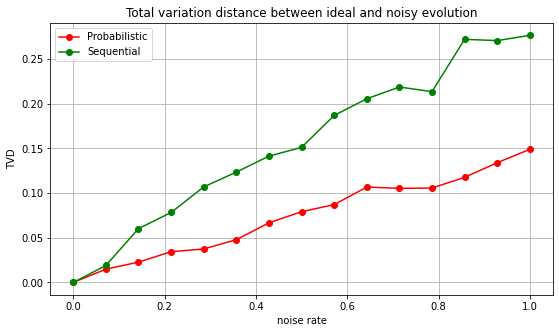

In [15]:
prob_vd = [vd_int(result, ideal_results) for result in resultsp]
seq_vd = [vd_int(result, ideal_results) for result in resultss]

## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Total variation distance between ideal and noisy evolution")
ax.set_ylabel("TVD")
ax.set_xlabel("noise rate")

ax.plot(scales, prob_vd, "-or", label="Probabilistic")
ax.plot(scales, seq_vd, "-og", label="Sequential")
ax.legend()

plt.show()

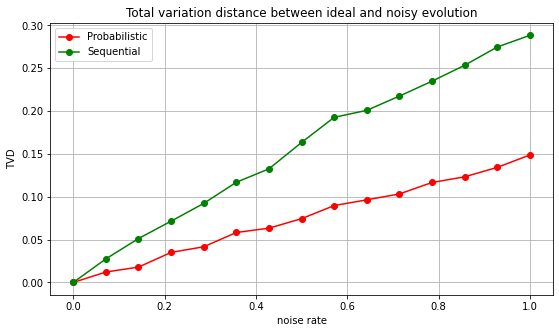

In [16]:
prob_vd = [vd_int(result, ideal_results) for result in resultsp1]
seq_vd = [vd_int(result, ideal_results) for result in resultss1]

## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Total variation distance between ideal and noisy evolution")
ax.set_ylabel("TVD")
ax.set_xlabel("noise rate")

ax.plot(scales, prob_vd, "-or", label="Probabilistic")
ax.plot(scales, seq_vd, "-og", label="Sequential")
ax.legend()

plt.show()

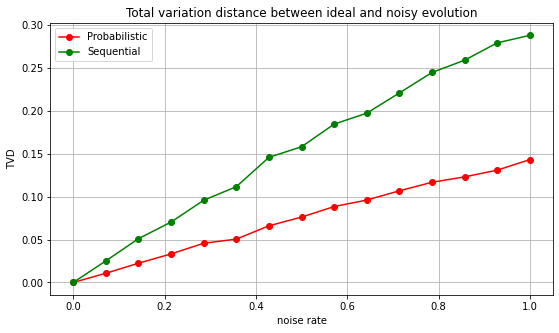

In [17]:
prob_vd = [vd_int(result, ideal_results) for result in resultsp2]
seq_vd = [vd_int(result, ideal_results) for result in resultss2]

## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Total variation distance between ideal and noisy evolution")
ax.set_ylabel("TVD")
ax.set_xlabel("noise rate")

ax.plot(scales, prob_vd, "-or", label="Probabilistic")
ax.plot(scales, seq_vd, "-og", label="Sequential")
ax.legend()

plt.show()

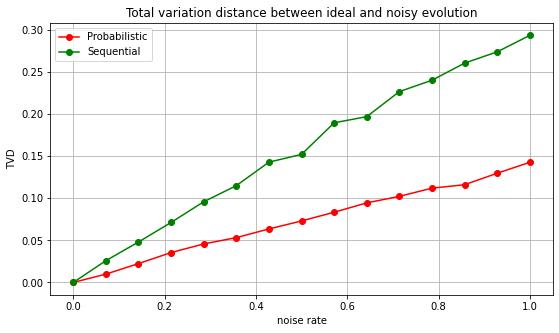

In [18]:
prob_vd = [vd_int(result, ideal_results) for result in resultsp3]
seq_vd = [vd_int(result, ideal_results) for result in resultss3]

## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Total variation distance between ideal and noisy evolution")
ax.set_ylabel("TVD")
ax.set_xlabel("noise rate")

ax.plot(scales, prob_vd, "-or", label="Probabilistic")
ax.plot(scales, seq_vd, "-og", label="Sequential")
ax.legend()

plt.show()

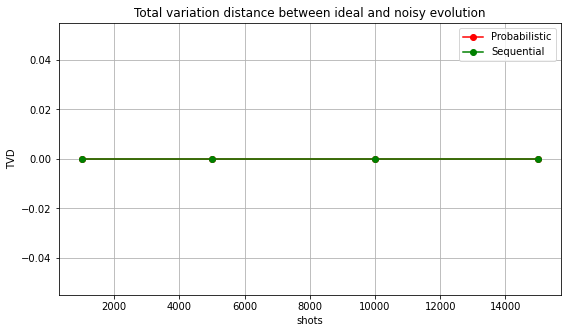

15


In [19]:
prob_vd = [vd_int(resultsp[0], ideal_results), vd_int(resultsp1[0], ideal_results), vd_int(resultsp2[0], ideal_results), vd_int(resultsp3[0], ideal_results)]
seq_vd = [vd_int(resultss[0], ideal_results), vd_int(resultss1[0], ideal_results), vd_int(resultss2[0], ideal_results), vd_int(resultss3[0], ideal_results)]

shots = [1000, 5000, 10000, 15000]


## Figure initialization
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.grid(True)
ax.set_title("Total variation distance between ideal and noisy evolution")
ax.set_ylabel("TVD")
ax.set_xlabel("shots")

ax.plot(shots, prob_vd, "-or", label="Probabilistic")
ax.plot(shots, seq_vd, "-og", label="Sequential")
ax.legend()

plt.show()

print(len(resultsp))